In [305]:

import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [306]:
df = pd.read_csv('/content/train (1).csv')[['Age','Fare','Survived']]

In [307]:
df

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,1
888,NaN,23.4500,0
889,26.0,30.0000,1


In [308]:
df.dropna(inplace=True)

In [309]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

/tmp/ipython-input-2853202726.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


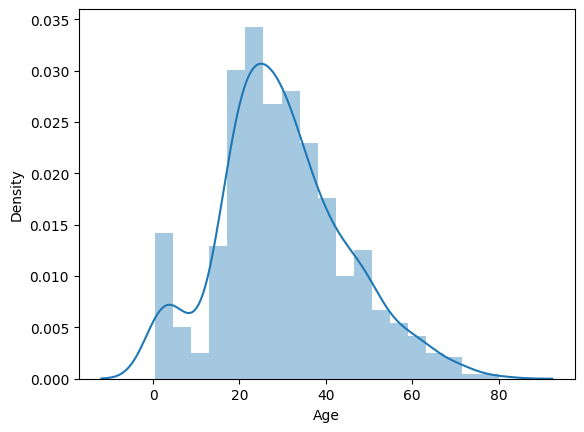

In [310]:
sns.distplot(x_train['Age'])
plt.show()

In [311]:
# ft = FunctionTransformer(func=np.log1p)

/tmp/ipython-input-1478139471.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


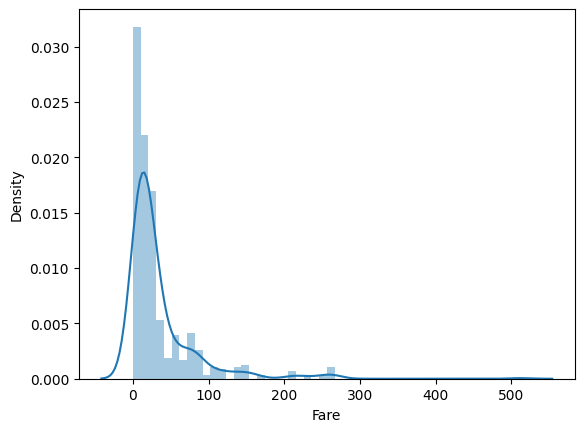

In [312]:
sns.distplot(x_train['Fare'])
plt.show()

In [313]:

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

print("LR",np.mean(cross_val_score(clf,x_train,y_train,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_train,y_train,scoring='accuracy',cv=10)))

Accuracy LR 0.6293706293706294
Accuracy DT 0.6433566433566433
LR 0.6706291591046581
DT 0.6358136721113128


In [314]:
ft = FunctionTransformer(func=np.log1p)

In [315]:
x_train_transformed = ft.fit_transform(x_train)
x_test_transformed = ft.fit_transform(x_test)


In [316]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred1))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

print("LR",np.mean(cross_val_score(clf,x_train_transformed,y_train,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_train_transformed,y_train,scoring='accuracy',cv=10)))

Accuracy LR 0.6433566433566433
Accuracy DT 0.6433566433566433
LR 0.6934059286146399
DT 0.6341197822141561


/tmp/ipython-input-347808029.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed['Fare'])


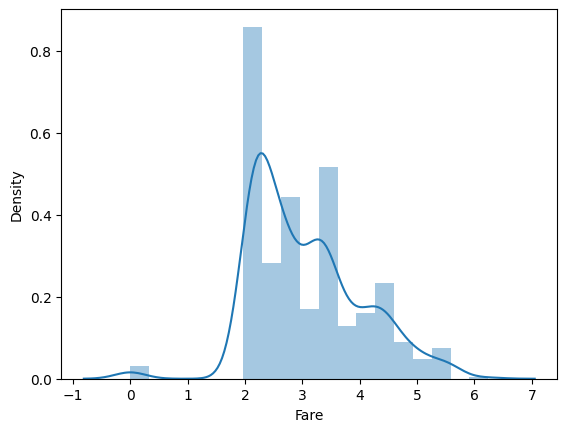

In [318]:
sns.distplot(x_train_transformed['Fare'])
plt.show()

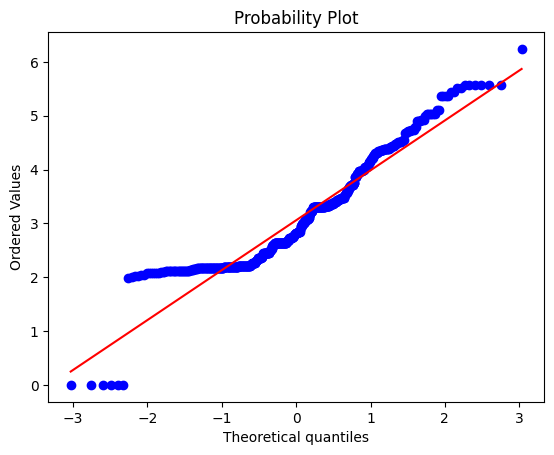

In [319]:
stats.probplot(x_train_transformed['Fare'],dist='norm',plot=plt)
plt.show()

In [326]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    x_train_transformed1 = trf.fit_transform(x_train)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,x_train_transformed1,y_train,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(x_train['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(x_train_transformed1[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6058983666061707


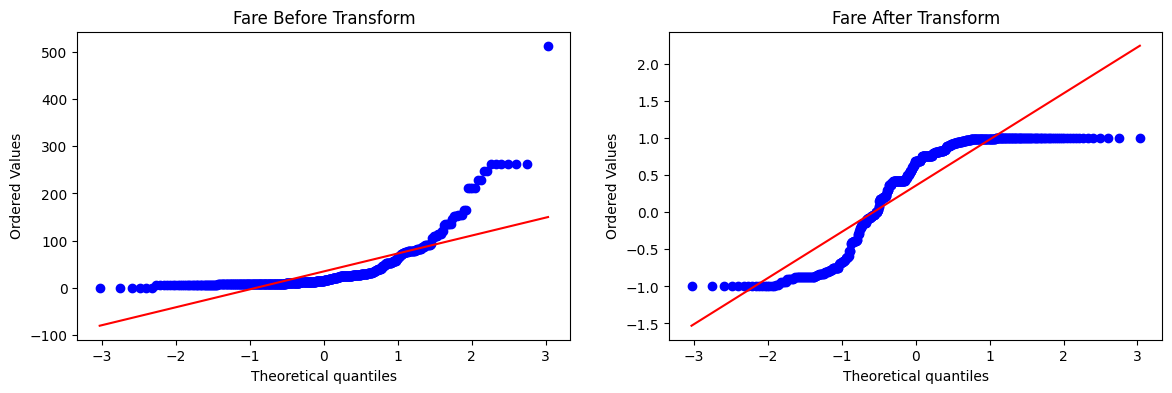

In [327]:
apply_transform(np.sin)